In [4]:
from pymongo import MongoClient
from itertools import islice
import pandas as pd
import numpy as np

In [5]:
client = MongoClient('localhost', 27017)

In [6]:
db = client.stalkbot
collection = db.activity

In [7]:
USER_PHONE_ID = "972549719719@c.us"  # Replace with your own user here

In [8]:
items = list(collection.find(dict(id=USER_PHONE_ID), dict(_id=0, id=0)))

In [9]:
len(items)

2515

In [10]:
table = pd.DataFrame(items)
table.set_index('timestamp', inplace=True)
table.index += pd.DateOffset(hours=3)

In [11]:
table

,isOnline
timestamp,
2020-10-11 11:34:45.681,False
2020-10-11 11:35:05.502,False
2020-10-11 11:35:25.518,False
2020-10-11 11:35:45.519,False
2020-10-11 11:36:05.519,False
...,...
2020-10-12 01:31:33.706,False
2020-10-12 01:31:53.705,False
2020-10-12 01:32:13.707,False


In [21]:
table['deltas'] = table.index.to_series().diff()

<AxesSubplot:xlabel='timestamp'>

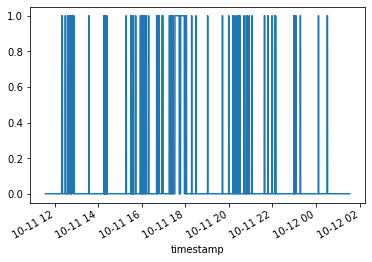

In [22]:
is_online = table['isOnline'].astype(int)
is_online.plot()

<AxesSubplot:xlabel='timestamp'>

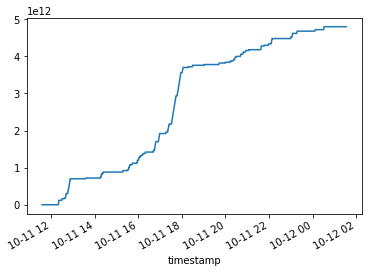

In [24]:
(is_online * table['deltas']).fillna(pd.Timedelta(seconds=0)).cumsum().plot()